# Classification approach with equal range distribution
### With and without using SMOTE

In [52]:
from warnings import simplefilter
from sklearn.decomposition import PCA
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("Genotyped.csv", index_col='index')
output = pd.read_csv("Phenotypes.csv", index_col="index")

In [54]:
num_bins = 5

In [55]:
df.shape

(599, 1279)

## Data preparation

In [56]:
df['avg_phen'] = output['average phenotypes']

In [57]:
df.head(5)

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443,avg_phen
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,0,0,0,0,1,-0.648708
1,1,1,1,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,1,0.155402
2,1,1,1,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,1,-0.368790
3,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,1,0,1,0,0.483285
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,0,1,1,0.778173


In [58]:
output_m = output.sort_values('average phenotypes', ascending=False)
output_m = output_m.reset_index(drop=True)
output_m.head(5)

,V1,V2,V3,V4,average phenotypes
0,-0.894342,1.409251,4.875385,-0.668887,1.796764
1,1.479731,2.706630,0.687950,1.597510,1.624770
2,0.262190,2.429909,2.073798,0.598635,1.588632
3,1.467962,2.322688,0.697090,0.999640,1.495913
4,0.418500,2.302861,1.240024,0.289867,1.320461


In [59]:
highest = output_m.iloc[0, -1:][0]
lowest = output_m.iloc[-1, -1:][0]
highest, lowest

(1.7967644880000002, -2.339534051)

**So, we know that the lowest avg phenotype is -2.33<br/>
And the highest avg phenotype is 1.79**

In [60]:
step = (highest - lowest) / num_bins
step

0.8272597078

In [61]:
bins = []
curr = lowest
for i in range(num_bins+1):
    bins.append(curr)
    curr = curr + step

bins

[-2.339534051,
 -1.5122743431999996,
 -0.6850146353999996,
 0.1422450724000004,
 0.9695047802000004,
 1.7967644880000004]

In [62]:
labels = []

for i in range(num_bins):
    labels.append(i)
    
labels

[0, 1, 2, 3, 4]

In [74]:
binned_df = pd.cut(df['avg_phen'], bins, labels=labels)
binned_df[0:5]

index
0    2
1    3
2    2
3    3
4    3
Name: avg_phen, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [78]:
# transform categorical values into integers
binned_df = binned_df.cat.codes

In [79]:
df['bin_n'] = binned_df

In [84]:
df = df.drop([165])

In [85]:
df.head(10)

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443,avg_phen,bin_n
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,0,0,1,-0.648708,2
1,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0.155402,3
2,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,-0.368790,2
3,0,1,1,1,1,0,1,1,1,1,...,1,1,0,0,1,0,1,0,0.483285,3
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,0,1,1,0.778173,3
5,1,1,1,1,1,0,1,1,1,1,...,1,1,0,0,0,0,1,1,1.012035,4
6,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,0.119381,2
7,1,1,0,1,1,0,0,1,1,1,...,1,1,0,0,1,1,0,0,-0.161635,2
8,0,1,0,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,-1.564314,0


### Final data preparation

In [86]:
X = df.drop(columns=['avg_phen', 'bin_n'])
X.shape

(598, 1279)

In [87]:
y = df['bin_n']
y.shape

(598,)

## Feature Selection

In [88]:
from sklearn.feature_selection import SelectKBest, f_regression

skb = SelectKBest(f_regression, k=500)
skb.fit(X, y)
X = skb.transform(X)

## Data scaling

In [89]:
df.groupby(['bin_n']).count()['avg_phen']

bin_n
0     11
1     68
2    262
3    218
4     39
Name: avg_phen, dtype: int64

<IPython.core.display.Javascript object>


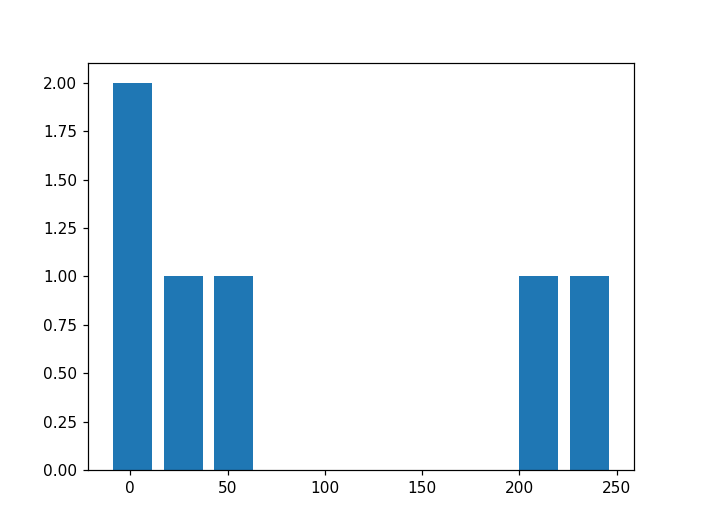

In [45]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
import numpy as np
hist, bin_edges = np.histogram(df.groupby(['bin_n']).count()['avg_phen'])
fig = plt.figure()
plt.bar(bin_edges[:-1], hist, width=20)
plt.show()

**Split the data into test and train**

In [90]:
from sklearn.model_selection import train_test_split

split = 0.2 # use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [92]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [93]:
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({2: 199, 3: 178, 1: 60, 4: 31, 0: 10})
After SMOTE:  Counter({2: 199, 0: 199, 1: 199, 3: 199, 4: 199})


## Training the model

In [94]:
parameters = {
    'n_estimators': [10,50,100],
    'max_depth' : [4,5,7,10],
    'learning_rate' : [0.0001, 0.001, 0.01]
}

In [95]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [97]:
classifier = xgboost.XGBClassifier()

In [98]:
random_search = RandomizedSearchCV(
    classifier,
    param_distributions=parameters,
    n_iter=5,
    scoring='f1_micro',
    n_jobs=-1,
    cv=5,
    verbose=3,
)

In [99]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X, y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   27.3s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.7s finished



Time taken: 0 hours 0 minutes and 37.37 seconds.


In [100]:
best_estimator = random_search.best_estimator_
best_estimator

XGBClassifier(learning_rate=0.001, max_depth=10, objective='multi:softprob')

In [101]:
best_params = random_search.best_params_
best_params

{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.001}

In [103]:
best_clf = xgboost.XGBClassifier(objective='reg:squarederror',
                        n_estimators=best_params['n_estimators'], 
                        max_depth=best_params['max_depth'], 
                        learning_rate=best_params['learning_rate'])

best_clf_smote = xgboost.XGBClassifier(objective='reg:squarederror',
                        n_estimators=best_params['n_estimators'], 
                        max_depth=best_params['max_depth'], 
                        learning_rate=best_params['learning_rate'])

In [104]:
best_clf.fit(X_train,y_train)

best_clf_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(learning_rate=0.001, max_depth=10, objective='multi:softprob')

In [105]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)

y_pred_smote = best_clf_smote.predict(X_test)
y_pred_tr_smote = best_clf_smote.predict(X_train_smote)

## Evaluation

**With SMOTE**

In [106]:
pd.crosstab(y_test, y_pred_smote)

col_0,0,1,2,3,4
bin_n,,,,,
0,0,0,1,0,0
1,0,1,2,3,2
2,1,8,29,21,4
3,0,3,15,17,5
4,0,0,4,4,0


In [108]:
from sklearn.metrics import f1_score
print('Training set:',f1_score(y_train_smote,y_pred_tr_smote, average='macro'))
print('Test set:',f1_score(y_test,y_pred_smote, average='macro'))

Training set: 0.9626972531085307
Test set: 0.20175438596491224


**Without SMOTE**

In [111]:
pd.crosstab(y_test, y_pred)

col_0,1,2,3,4
bin_n,,,,
0,0,1,0,0
1,0,6,2,0
2,4,31,27,1
3,2,15,22,1
4,0,2,5,1


In [110]:
from sklearn.metrics import f1_score
print('Training set:',f1_score(y_train,y_pred_tr, average='macro'))
print('Test set:',f1_score(y_test,y_pred, average='macro'))

Training set: 0.8852490660556345
Test set: 0.23311504879301492


### Trainig the model with SVM RBF kernel

In [116]:
from sklearn.svm import SVR

classifier = SVR(kernel='rbf') 

grid = {
    'C' : [10**i for i in range(-10,10,2)] ,
    'gamma' : [2**i for i in range(-10,10,2)]
   }

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 1, 'gamma': 0.00390625}


In [124]:
best_clf = SVR(kernel='rbf',C=best_parameters['C'], gamma=best_parameters['gamma'])
best_clf.fit(X_train,y_train)

SVR(C=1, gamma=0.00390625)

In [133]:
y_pred = best_clf.predict(X_test)
y_pred

array([2.92503427, 2.6598632 , 1.86580795, 1.90173906, 2.54539767,
       1.97915947, 1.90044826, 2.63891202, 2.62306806, 2.18269712,
       1.97089223, 1.98368991, 2.38809611, 2.11418929, 2.54678579,
       2.9445089 , 2.42455837, 2.997293  , 2.26613714, 2.92250213,
       2.0762663 , 2.40676211, 2.86876274, 2.62927206, 1.82061132,
       2.35225465, 1.60439889, 2.18048158, 2.68231455, 2.09207087,
       2.81540088, 2.22471693, 2.34678987, 2.59493284, 2.14640676,
       2.74786983, 1.74728815, 2.82898367, 2.31471231, 2.07085249,
       2.39557058, 2.44740384, 1.9645804 , 2.04583593, 1.74216332,
       2.92912288, 2.16141738, 2.10257632, 2.94848224, 2.19095678,
       2.38495728, 2.74187775, 2.19030962, 2.91820999, 2.67017215,
       2.58517432, 2.92990577, 1.95941668, 1.62845655, 2.60229256,
       2.46392685, 1.98809934, 2.81032936, 2.64711599, 2.67512517,
       2.9524631 , 2.66477527, 2.9489465 , 2.27718489, 2.91868453,
       2.80941671, 2.75843699, 2.19196708, 1.85228864, 2.08389

In [ ]:
y_pred = np.rint(y_pred)
y_pred = y_pred.astype(int)

In [130]:
pd.crosstab(y_test, y_pred)

col_0,1,2,3
bin_n,,,
0,0,0,1
1,0,6,2
2,2,38,23
3,0,17,23
4,0,1,7


In [131]:
from sklearn.metrics import f1_score
print('Test set:',f1_score(y_test,y_pred, average='macro'))

Test set: 0.2174333333333333
